In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
#input data

rw = 0.354 #ft

ct = 22.6E-6 #psi-1

Q = 4900 #STB/D

h = 482 #ft

Pwf = 3090.57 #psi(at dt = 0)

mu = 0.20 #cp

Bo = 1.55 #bbl/STB

phi = 0.09

tp = 310 #hrs

re = 2640 #ft

In [92]:
df = pd.read_excel('Pressure_Data.xlsx')

In [93]:
df.head()

,dt,Pws
0,0.00,3090.57
1,0.10,3093.81
2,0.21,3096.55
3,0.31,3100.03
4,0.52,3103.27


In [94]:
dt = np.array(df['dt'])
df['dt']= dt

In [95]:
ddt = []

for i in range(len(dt)):
    if i == 0:
        ddt.append(0)
    else:
        ddt.append(tp+dt[i])
        
ddt = np.array(ddt)

In [96]:
df['ddt'] = ddt

In [97]:
df.head()

,dt,Pws,ddt
0,0.00,3090.57,0.00
1,0.10,3093.81,310.10
2,0.21,3096.55,310.21
3,0.31,3100.03,310.31
4,0.52,3103.27,310.52


In [98]:
dtt = []

for j in range(len(ddt)):
    if j == 0:
        dtt.append(0)
    else:
        dtt.append(ddt[j]/dt[j])
    
dtt = np.array(dtt)

In [99]:
df['dtt']= dtt

In [100]:
df.head()

,dt,Pws,ddt,dtt
0,0.00,3090.57,0.00,0.000000
1,0.10,3093.81,310.10,3101.000000
2,0.21,3096.55,310.21,1477.190476
3,0.31,3100.03,310.31,1001.000000
4,0.52,3103.27,310.52,597.153846


In [122]:
logdt = []

for k in range (len(dt)):
    if k == 0:
        logdt.append(0)
    else:
        logdt.append(np.log10(df['dtt'][k]))
        
logdt = np.array(logdt)

In [123]:
df['logdt'] = logdt

In [124]:
df.head()

,dt,Pws,ddt,dtt,logdt
0,0.00,3090.57,0.00,0.000000,0.000000
1,0.10,3093.81,310.10,3101.000000,3.491502
2,0.21,3096.55,310.21,1477.190476,3.169436
3,0.31,3100.03,310.31,1001.000000,3.000434
4,0.52,3103.27,310.52,597.153846,2.776086


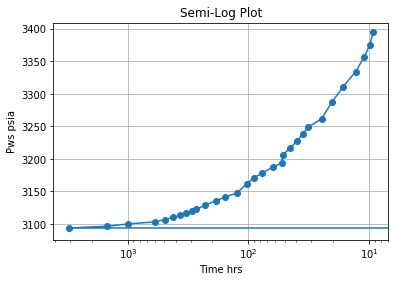

In [130]:
plt.semilogx(df['dtt'],df['Pws'],marker = 'o')
plt.gca().invert_xaxis()
plt.title('Semi-Log Plot')

plt.xlabel('Time hrs')
plt.ylabel('Pws psia')

plt.grid()

In [131]:
coeffs =  np.polyfit(df['logdt'],df['Pws'],1)

In [136]:
m = -coeffs[0]

In [137]:
k = (162.6*Q*Bo*mu)/(m*h)

In [140]:
print(f'--> Hence the slope is: {m}')

--> Hence the slope is: 85.19648787710743


In [141]:
print(f'--> Hence the Natural Absolute Permeability of the reservoir is: {k} mD.')

--> Hence the Natural Absolute Permeability of the reservoir is: 6.014639263275649 mD.
